1. read an image
2. plot the histogram of several bands.
3. select the band with high seperation between background to plant.
4. set a treshold and select the pixels above it.
5. present new image after treshold

In [ ]:
!pip install spectral
import spectral.io.envi as envi
from pathlib import Path
from spectral import *
import matplotlib.pyplot as plt
import skimage.io as io
from skimage import transform
import skimage
import numpy as np
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 7.9 MB/s 


## Read the image

In [ ]:
path = '/content/drive/MyDrive/gdrive_folder/To test/1295/results/REFLECTANCE_1295.hdr'
img = open_image(path)
# print(h)
print(img)

	Data Source:   '/content/drive/MyDrive/gdrive_folder/To test/1295/results/REFLECTANCE_1295.dat'
	# Rows:            512
	# Samples:         512
	# Bands:           204
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


In [ ]:
img.shape

(512, 512, 204)

## Plot pixel graph

1. insert values of wavelength
2. create dictionary to convert band to wavelength
3. present 1 pixel spectral graph

In [ ]:
# from here i exctract the wavelength
# df = pd.read_excel("/content/30_05_2022_Hyper.xlsx")
# df
# band_to_wl_dict = dict(zip(df.index, df.wavelength))
# band_to_wl_dict.values()

In [ ]:
bands = np.arange(0,204,1)
wavelength = [397.32, 400.2, 403.09, 405.97, 408.85, 411.74, 414.63, 417.52, 420.4, 423.29, 426.19, 429.08, 431.97, 434.87, 437.76, 440.66, 443.56, 446.45, 449.35, 452.25, 455.16, 458.06, 460.96, 463.87, 466.77, 469.68, 472.59, 475.5, 478.41, 481.32, 484.23, 487.14, 490.06, 492.97, 495.89, 498.8, 501.72, 504.64, 507.56, 510.48, 513.4, 516.33, 519.25, 522.18, 525.1, 528.03, 530.96, 533.89, 536.82, 539.75, 542.68, 545.62, 548.55, 551.49, 554.43, 557.36, 560.3, 563.24, 566.18, 569.12, 572.07, 575.01, 577.96, 580.9, 583.85, 586.8, 589.75, 592.7, 595.65, 598.6, 601.55, 604.51, 607.46, 610.42, 613.38, 616.34, 619.3, 622.26, 625.22, 628.18, 631.15, 634.11, 637.08, 640.04, 643.01, 645.98, 648.95, 651.92, 654.89, 657.87, 660.84, 663.81, 666.79, 669.77, 672.75, 675.73, 678.71, 681.69, 684.67, 687.65, 690.64, 693.62, 696.61, 699.6, 702.58, 705.57, 708.57, 711.56, 714.55, 717.54, 720.54, 723.53, 726.53, 729.53, 732.53, 735.53, 738.53, 741.53, 744.53, 747.54, 750.54, 753.55, 756.56, 759.56, 762.57, 765.58, 768.6, 771.61, 774.62, 777.64, 780.65, 783.67, 786.68, 789.7, 792.72, 795.74, 798.77, 801.79, 804.81, 807.84, 810.86, 813.89, 816.92, 819.95, 822.98, 826.01, 829.04, 832.07, 835.11, 838.14, 841.18, 844.22, 847.25, 850.29, 853.33, 856.37, 859.42, 862.46, 865.5, 868.55, 871.6, 874.64, 877.69, 880.74, 883.79, 886.84, 889.9, 892.95, 896.01, 899.06, 902.12, 905.18, 908.24, 911.3, 914.36, 917.42, 920.48, 923.55, 926.61, 929.68, 932.74, 935.81, 938.88, 941.95, 945.02, 948.1, 951.17, 954.24, 957.32, 960.4, 963.47, 966.55, 969.63, 972.71, 975.79, 978.88, 981.96, 985.05, 988.13, 991.22, 994.31, 997.4, 1000.49, 1003.58]
bands_to_wl = dict(zip(bands, wavelength))
# bands_to_wl

In [ ]:
def plot_pixel(img,pixel_y,pixel_x,bands):

  leaf_pixel = img[
      pixel_y:pixel_y+1,
      pixel_x:pixel_x+1,
      :]

  leaf_pixel_squeezed = np.squeeze(leaf_pixel)

  plt.plot(bands, leaf_pixel_squeezed)
  plt.title('Spectral signiture\n(Pixel {},{})'.format(
      pixel_x, pixel_y),fontsize=16)
  plt.xlabel('Wavelength',fontsize=14)
  plt.ylabel('Reflectance',fontsize=14)
  plt.show()

Example:

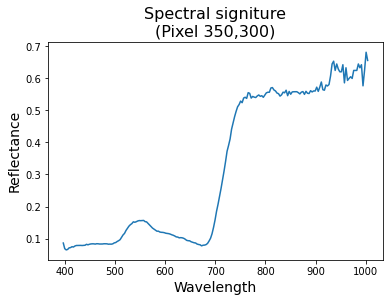

In [ ]:
plot_pixel(img,300,350,wavelength)

## Present RGB image

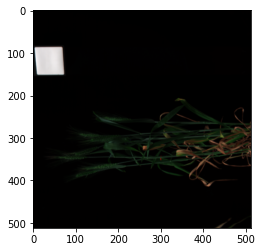

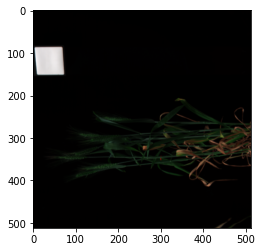

In [ ]:
red = img[:,:,97] #680 nm
green = img[:,:,53] # 550 nm
blue = img[:,:,30] # 410
nir = img[:,:,140] # 810
yellow = img[:,:,46]  #532

# 3 bands into new image
RGB_Image = np.dstack([red,green,blue])#RGB  color composite
imshow(RGB_Image)

# present the oroginal image with this bands
v= imshow(img,(98,53,30))

(array([2.17688e+05, 5.32600e+03, 4.90800e+03, 5.66700e+03, 5.16800e+03,
        4.39300e+03, 3.72700e+03, 2.94700e+03, 2.44500e+03, 1.77400e+03,
        1.20300e+03, 8.17000e+02, 5.72000e+02, 3.44000e+02, 2.30000e+02,
        1.60000e+02, 1.20000e+02, 1.25000e+02, 1.23000e+02, 8.60000e+01,
        4.60000e+01, 2.90000e+01, 2.60000e+01, 1.30000e+01, 1.20000e+01,
        7.00000e+00, 7.00000e+00, 1.00000e+01, 1.60000e+01, 1.30000e+01,
        1.80000e+01, 3.10000e+01, 3.00000e+01, 3.10000e+01, 5.20000e+01,
        5.00000e+01, 3.30000e+01, 3.40000e+01, 6.40000e+01, 8.50000e+01,
        1.35000e+02, 1.62000e+02, 8.42000e+02, 1.28500e+03, 6.06000e+02,
        5.07000e+02, 1.00000e+02, 4.60000e+01, 2.00000e+01, 1.10000e+01]),
 array([0.00142959, 0.02432347, 0.04721735, 0.07011124, 0.09300511,
        0.115899  , 0.13879287, 0.16168676, 0.18458064, 0.20747453,
        0.2303684 , 0.25326228, 0.27615616, 0.29905003, 0.32194394,
        0.3448378 , 0.3677317 , 0.39062557, 0.41351944, 0.436413

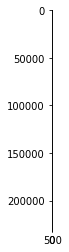

In [ ]:
# Present 1 band
v1 = imshow(green)
# flat the array and present histogram:
green_flat = green.flatten()
plt.hist(green_flat,bins=50)

# Thresholds

## Green Index
Create Green index based on:
$$GI = \frac{Green-Red}{Green+Red}$$

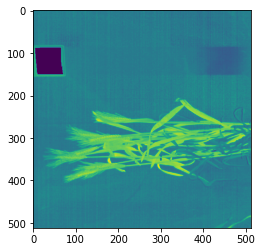

In [ ]:
gi = (green-red)/(green+red) #Calculate the index
v2 = imshow(gi,cmap="viridis")

(array([1.0000e+00, 3.0000e+00, 9.0000e+00, 1.1000e+01, 2.1000e+01,
        7.1000e+01, 2.4000e+02, 9.9500e+02, 1.7620e+03, 2.4860e+03,
        1.7670e+03, 1.2957e+04, 6.2800e+02, 2.9107e+04, 4.4690e+04,
        4.0010e+04, 3.9696e+04, 2.5978e+04, 9.5360e+03, 5.6100e+03,
        2.9230e+03, 2.2490e+03, 1.3710e+03, 1.3850e+03, 1.3590e+03,
        4.7140e+03, 1.0360e+03, 1.2020e+03, 1.3550e+03, 1.4810e+03,
        1.4880e+03, 2.0350e+03, 2.5540e+03, 2.4720e+03, 3.0340e+03,
        3.3670e+03, 3.1200e+03, 2.7550e+03, 2.2920e+03, 1.8940e+03,
        1.1700e+03, 6.8900e+02, 3.2500e+02, 1.5000e+02, 4.7000e+01,
        3.0000e+01, 2.3000e+01, 1.3000e+01, 2.0000e+01, 1.3000e+01]),
 array([-0.7061888 , -0.6781581 , -0.65012735, -0.62209666, -0.59406596,
        -0.5660352 , -0.5380045 , -0.50997376, -0.48194307, -0.45391238,
        -0.42588165, -0.39785093, -0.3698202 , -0.3417895 , -0.3137588 ,
        -0.28572807, -0.25769734, -0.22966665, -0.20163593, -0.17360522,
        -0.1455745 , -0.11

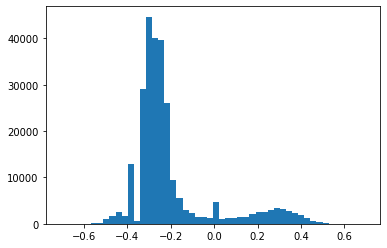

In [ ]:
# flat the array and present histogram:
gi_flat = gi.flatten()
plt.hist(gi_flat,bins=50)

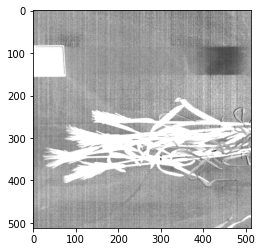

In [ ]:
thresh = 0.0001
gi_thresh = np.where(gi < 0, gi, 0) # bebeath white reference
# green_thresh =np.where(green_thresh > thresh, green, 0)
v3= imshow(gi_thresh)

In [ ]:
import matplotlib.patches as mpatches
gi_thresh_bin=np.where(gi_thresh < 0, gi_thresh, 1) 
v= imshow(gi_thresh_bin, cmap='Greys')
np.unique(gi_thresh_bin)


classes = ['plant','not plant']
class_colours = ['black','white']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

NameError: ignored

(array([1.1600e+02, 2.0237e+04, 1.8140e+05, 2.2138e+04, 3.3250e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4928e+04]),
 array([-0.7061888 , -0.5355699 , -0.36495104, -0.19433215, -0.02371328,
         0.1469056 ,  0.3175245 ,  0.48814335,  0.6587622 ,  0.8293811 ,
         1.        ], dtype=float32),
 <a list of 10 Patch objects>)

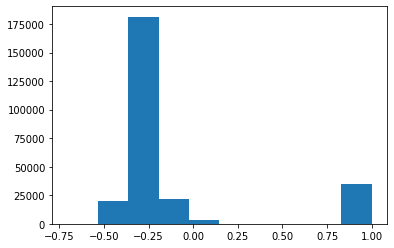

In [ ]:
plt.hist(gi_thresh_bin.flatten())

## Yellow

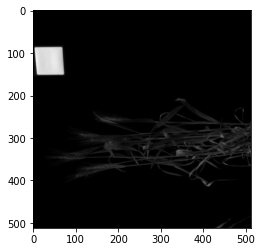

In [ ]:
thresh = 0.01
yellow_thresh = np.where(yellow > thresh, yellow, 0) # bebeath white reference
v3= imshow(yellow_thresh)

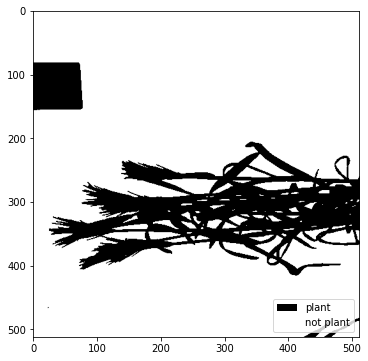

In [ ]:
import matplotlib.patches as mpatches

yellow_thresh_bin=np.where(yellow_thresh  < 0.9, yellow_thresh , yellow_thresh*0)
yellow_thresh_bin=np.where(yellow_thresh  < thresh, yellow_thresh , 1)
# yellow_thresh_bin = np.where(yellow < thresh, yellow, 0) # bebeath white reference 
v= imshow(yellow_thresh_bin , cmap='Greys',figsize=(8,6))
#


classes = ['plant','not plant']
class_colours = ['black','white']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(recs,classes,loc=4)

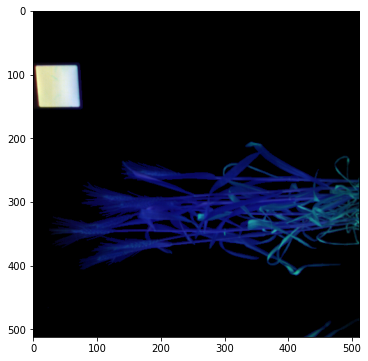

In [ ]:
v1 = imshow(img[:,:,:]*yellow_thresh_bin,figsize=(8,6),cmap="Greys")

## $(\frac{NIR-RED-GREEN}{NIR+RED+GREEN})$

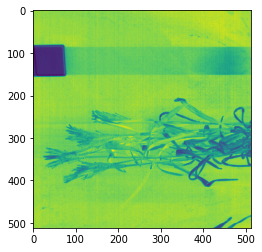

In [ ]:
norm_g = (nir-red-green)/(nir+red+green)
v = imshow(norm_g,cmap="viridis")

set new imge based on the threshold

## $(\frac{NIR-RED-Yellow}{NIR+RED+YELLOW})$

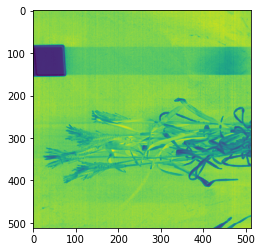

In [ ]:
norm_y = (nir-red-yellow)/(nir+red+yellow)
v = imshow(norm_y,cmap="viridis")

# Draft

In [ ]:
pip install mpldatacursor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


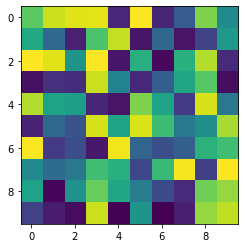

In [ ]:
import mpldatacursor

data = np.random.random((10,10))

fig, ax = plt.subplots()
ax.imshow(data, interpolation='none')

mpldatacursor.datacursor(hover=True, bbox=dict(alpha=1, fc='w'))
plt.show()